# Import necessary libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from PIL import Image

# Load images from the train and test directories

In [3]:
train_directory = "./battery_discharging/normal_masked/*.png"
test_directory = "./battery_discharging/test/masked/*.png"

train_image_paths = glob.glob(train_directory)
test_image_paths = glob.glob(test_directory)

print(f"Number of training images: {len(train_image_paths)}")
print(f"Number of testing images: {len(test_image_paths)}")

Number of training images: 909
Number of testing images: 330


# Function to load and flatten images

In [4]:
def load_images(image_paths):
    image_data = []
    
    for path in image_paths:
        image = Image.open(path).convert('L')
        image = image.resize((80, 60))
        image_array = np.array(image).flatten()
        image_data.append(image_array)
    return np.array(image_data)

# Load the images

In [5]:
train_image_data = load_images(train_image_paths)
test_image_data = load_images(test_image_paths)

print(f"Train image data shape: {train_image_data.shape}")
print(f"Test image data shape: {test_image_data.shape}")

Train image data shape: (909, 4800)
Test image data shape: (330, 4800)


# Normalize the data

In [6]:
scaler = StandardScaler()
train_image_data_scaled = scaler.fit_transform(train_image_data)
test_image_data_scaled = scaler.transform(test_image_data)

# Implement Isolation Forest

In [7]:
isolation_forest = IsolationForest(contamination=0.10)
isolation_forest.fit(train_image_data_scaled)

IsolationForest(contamination=0.1)

# Predict anomalies in the test set and measure inference times

In [1]:
import time
import numpy as np

# Initialize an empty list to store inference times and predictions
inference_times = []
anomaly_predictions = []  # List to store anomaly predictions

# Perform predictions and measure time for each
for i, path in enumerate(test_image_paths):
    start_time = time.time()  # Start time before prediction
    anomaly_scores = isolation_forest.predict([test_image_data_scaled[i]])  # Predict single image data
    end_time = time.time()  # End time after prediction

    # Calculate the inference time in milliseconds
    inference_time = (end_time - start_time)
    inference_times.append(inference_time)

    # Store the prediction result
    anomaly_prediction = "Anomaly" if anomaly_scores == -1 else "Normal"
    anomaly_predictions.append(anomaly_prediction)  # Append to predictions list

    print(f"Test Image: {path.split('/')[-1]} - Prediction: {anomaly_prediction}")

# Calculate mean inference time
mean_inference_time = np.mean(inference_times) * 1000

# Print mean inference time and list of anomaly predictions
print(f"Mean Inference Time: {mean_inference_time:.2f} ms")
print("Anomaly Predictions:", anomaly_predictions)


NameError: name 'test_image_paths' is not defined

# Count anomalies

In [9]:
num_anomalies = np.sum(anomaly_predictions == "Anomaly")
num_normal = np.sum(anomaly_predictions == "Normal")

print(f"Total anomalies detected in test set: {num_anomalies}")
print(f"Total normal cases detected in test set: {num_normal}")

NameError: name 'anomaly_predictions' is not defined

# Calculate Evaluation Metrics

AUC-ROC: 0.906
Precision: 0.890
Recall: 0.866


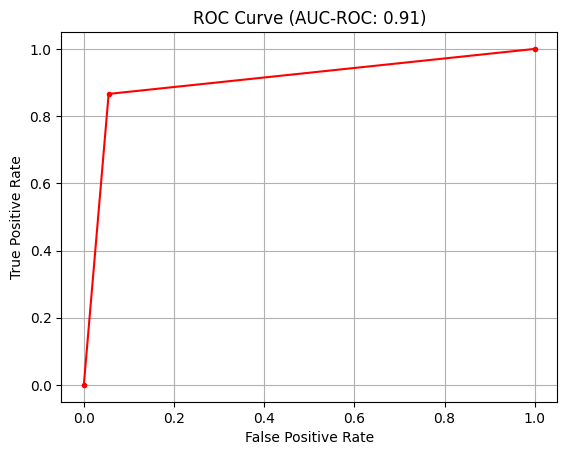

In [28]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve
import os
import matplotlib.pyplot as plt

# Create a new array of 0s and 1s for labels
y_test = [1 if os.path.basename(path).startswith("a_") else -1 for path in test_image_paths]

# Calculate AUC-ROC (negate scores because lower scores indicate anomalies)
auc_roc = roc_auc_score(y_test, -anomaly_scores)  # Use -anomaly_scores to reflect anomaly likelihood
print(f"AUC-ROC: {auc_roc:.3f}")

# Binarize anomaly_scores based on a threshold (assuming 0 as the threshold for binary classification)
threshold = 0
y_pred = [1 if score < threshold else -1 for score in anomaly_scores]  # Negative scores -> anomalies (label = 1)

# Calculate Precision and Recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, -anomaly_scores)
plt.plot(fpr, tpr, marker='.', color='r')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve (AUC-ROC: {auc_roc:.2f})')
plt.grid(True)
plt.show()


# Visualize one anomaly and one normal image

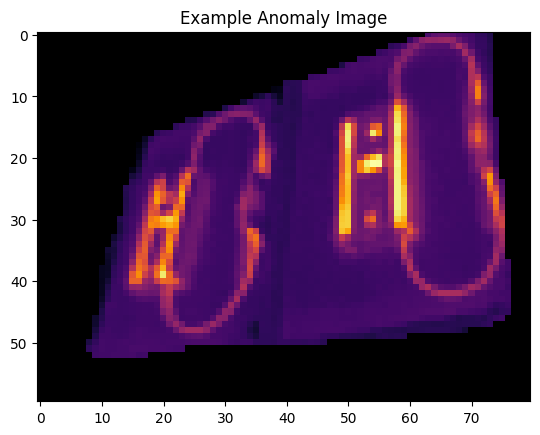

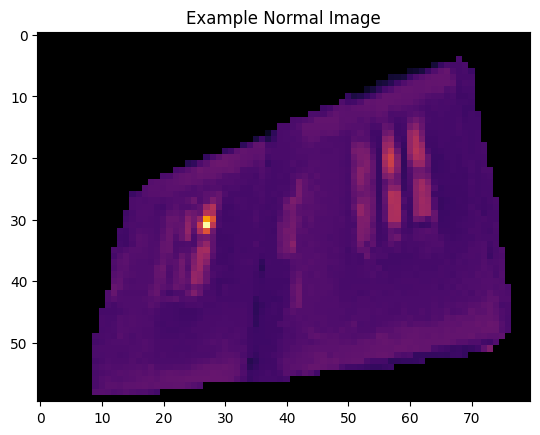

In [13]:
anomaly_indices = np.where(anomaly_predictions == "Anomaly")[0]
normal_indices = np.where(anomaly_predictions == "Normal")[0]

# Show an example anomaly image
if len(anomaly_indices) > 0:
    anomaly_image = Image.open(test_image_paths[anomaly_indices[10]])
    plt.imshow(anomaly_image, cmap='gray')
    plt.title('Example Anomaly Image')
    plt.show()

# Show an example normal image
if len(normal_indices) > 0:
    normal_image = Image.open(test_image_paths[normal_indices[1]])
    plt.imshow(normal_image, cmap='gray')
    plt.title('Example Normal Image')
    plt.show()